## Task 1

In [18]:
import os
import sys
import matplotlib.pyplot as plt
import cv2
import numpy as np
import tools as tl

In [65]:
def getGradient(gray, x = 0, y = 0, useGradient = True):
    if useGradient:
        grad = cv2.Sobel(gray, ddepth=cv2.CV_32F, dx=x, dy=y, ksize=3)

        '''
            take absolute value of gradient to use negative gradient
        '''
        grad = np.absolute(grad)

        '''
            Normalization of gradient
        '''
        (minVal, maxVal) = (np.min(grad), np.max(grad)) 
        if maxVal - minVal > 0:
            grad = (255 * ((grad - minVal) / float(maxVal - minVal))).astype("uint8")
        else:
            grad  = np.zeros(gray.shape, dtype = "uint8")

    else:
        grad = cv2.adaptiveThreshold(   gray,
                                        255,
                                        cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                        cv2.THRESH_BINARY_INV,
                                        11,
                                        2)

    return grad

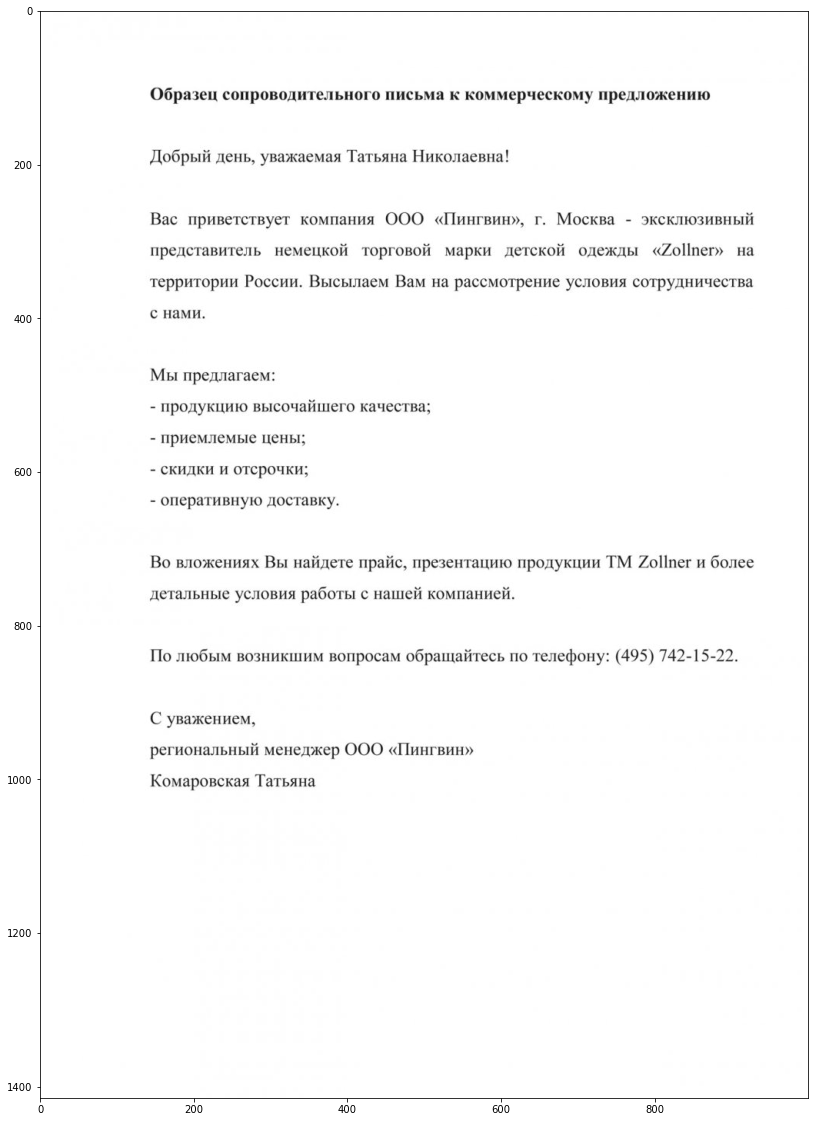

In [85]:
img = cv2.imread('assets/7.jpg', 0)
vis = cv2.imread('assets/7.jpg')
fig, ax = plt.subplots(figsize=(20, 20))
ax.imshow(img, cmap='gray')
plt.show()

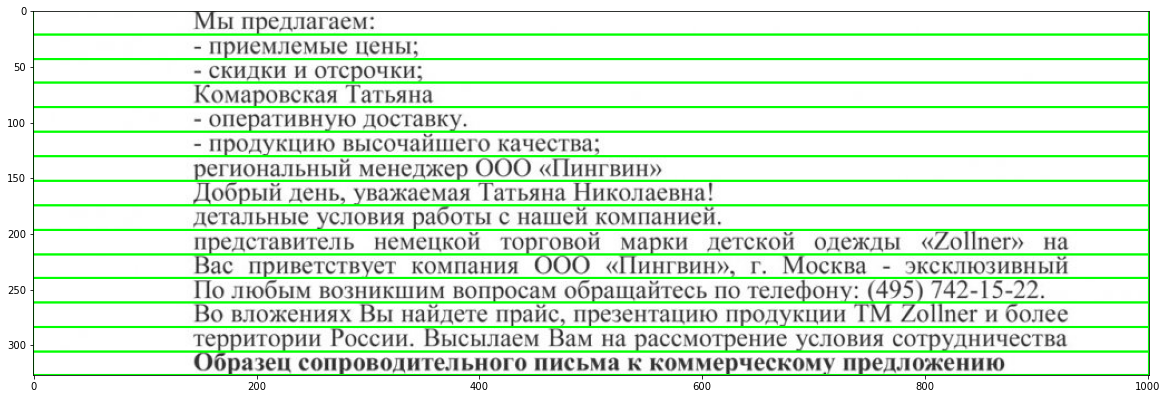

In [86]:
ver_bin_img = getGradient(img, x = 1, useGradient = True)
verp = np.sum(ver_bin_img, axis=1) / 255
drawedverp = tl.getDrawProjectionVer(img, verp)
ver_half = int(np.max(verp) / 2)
ver_sliceLine = drawedverp[:,(ver_half-1):(ver_half+1)]
ver_contours, ver_hierarchy = cv2.findContours(cv2.cvtColor(ver_sliceLine, 
                                                       cv2.COLOR_BGR2GRAY), 
                                                       cv2.RETR_EXTERNAL, 
                                                       cv2.CHAIN_APPROX_SIMPLE)
ver_heights = []
for cnt in ver_contours:
    x,y,w,h = cv2.boundingRect(cnt)
    ver_heights.append(h)
ver_median_height = int(np.median(np.asarray(ver_heights)) * 1.5)
drawedverp = cv2.line(drawedverp, 
                      (ver_half,0), 
                      (ver_half,drawedverp.shape[0]), 
                      (0,0,255), 
                      1)
ver_kernel = ver_median_height
verpConvolved = np.convolve(verp, np.ones((ver_kernel,))/ver_kernel, mode='same')
drawedverpconv = tl.getDrawProjectionVer(img, verpConvolved)
ver_bandP1ranges = []
c1 = 0.3
c2 = 0.4
while np.max(verpConvolved) > 40:
    ybm = np.argmax(verpConvolved)

    yb0 = tl.findb0(verpConvolved, 
                    ybm, 
                    c1 * verpConvolved[ybm])
    yb1 = tl.findb1(verpConvolved, 
                    ybm, 
                    c2 * verpConvolved[ybm])

    if yb1 - yb0 > ver_median_height:
        ver_bandP1ranges.append((yb0,yb1))

    verpConvolved[yb0:yb1] = 0
    
ver_bandsImg = np.zeros(vis.shape, dtype = np.uint8)

for band in ver_bandP1ranges:
    yt, yb = band
    ver_bandsImg[yt:yb] = [125,0,0]
ver_band_crop = []

for band in ver_bandP1ranges:
    yt, yb = band
    cropped = img[yt:yb, ...]
    ver_band_crop.append(cropped)
    
ver_band_crop = ver_band_crop[::-1]
cropped = tl.concat_ver(ver_band_crop)
fig, ax = plt.subplots(figsize=(20, 20))
ax.imshow(cropped, cmap='gray')
plt.show()

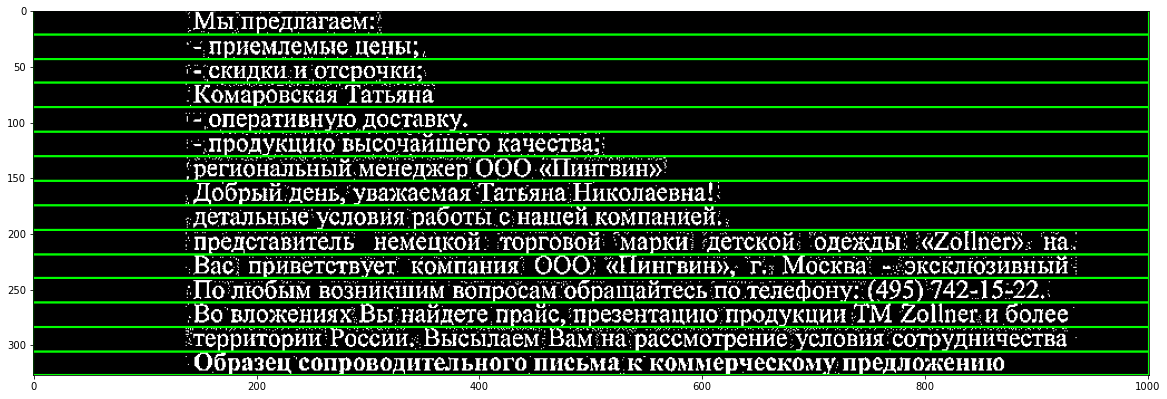

In [87]:
bin_imgs = []
for i in range(len(ver_band_crop)):
    ver_img = getGradient(ver_band_crop[i], x = 1, useGradient = False)
    bin_imgs.append(ver_img)
me = tl.concat_ver(bin_imgs)
fig, ax = plt.subplots(figsize=(20, 20))
ax.imshow(me, cmap='gray')
plt.show()

In [88]:
img.shape

(1415, 1000)

In [89]:
bin_imgs[0].shape

(20, 1000)

In [90]:
for i in range(len(bin_imgs)):
    kernel = np.ones((2,2), np.uint8)
    opening = cv2.morphologyEx(bin_imgs[i], cv2.MORPH_GRADIENT, kernel)
    bin_imgs[i] = opening

0
median_height 3


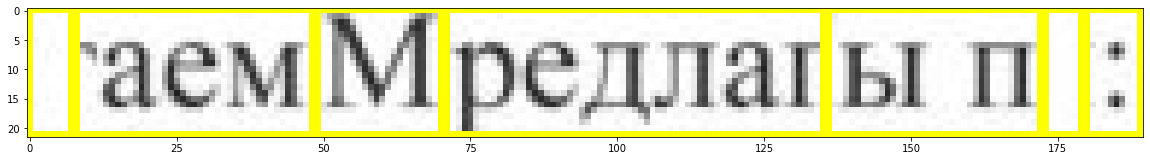

1
median_height 3


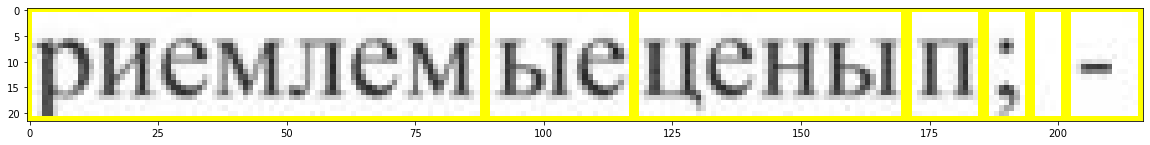

2
median_height 3


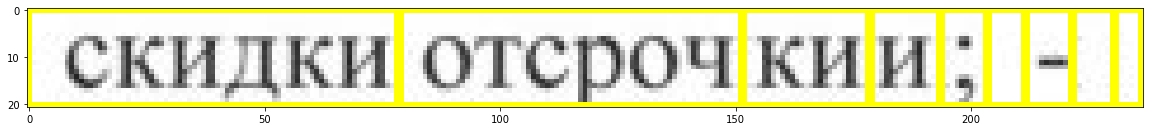

3
median_height 3


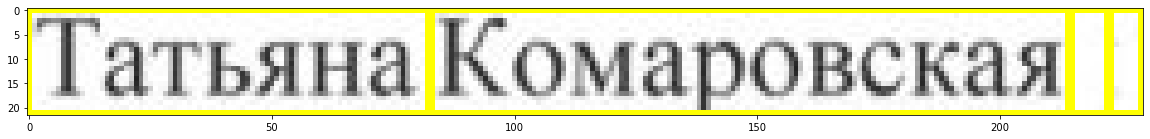

4
median_height 3


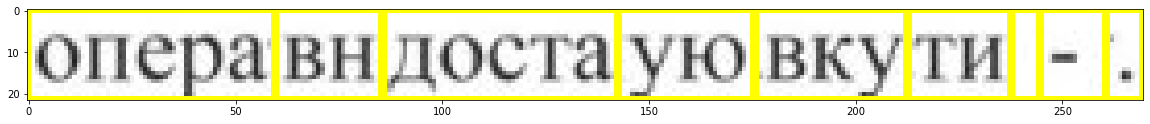

5
median_height 3


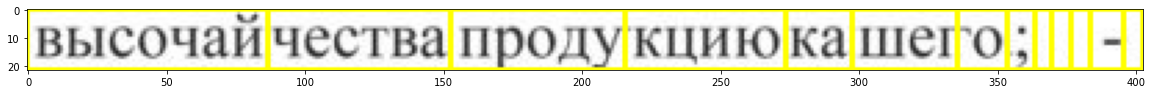

6
median_height 3


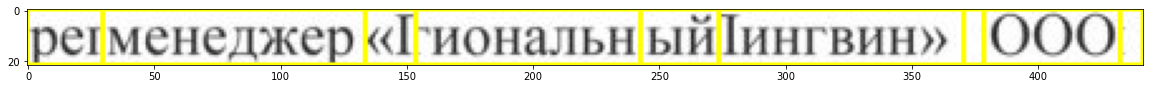

7
median_height 3


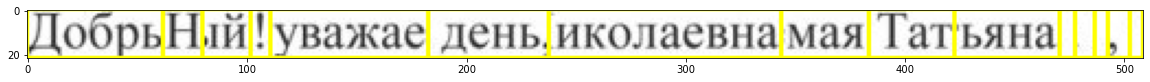

8
median_height 3


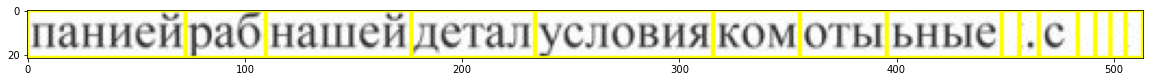

9
median_height 3


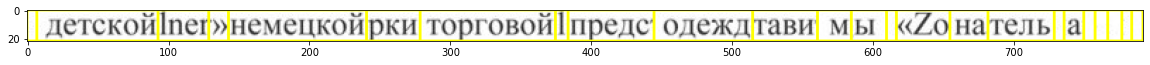

10
median_height 3


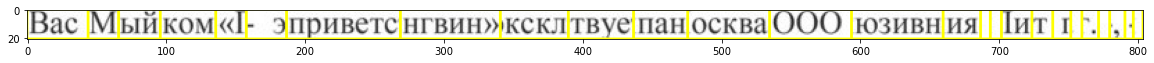

11
median_height 3


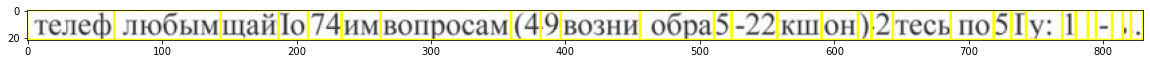

12
median_height 3


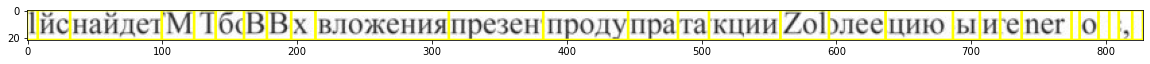

13
median_height 3


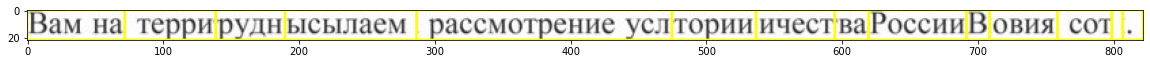

14
median_height 3


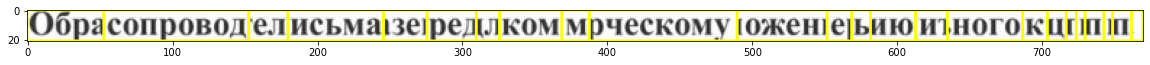

In [91]:
result = []
for i in range(len(bin_imgs)):
    print(i)
    horp = np.sum(bin_imgs[i], axis=0) / 255
    horp.shape
    drawedhorp = tl.getDrawProjectionHor(bin_imgs[i], horp)
    plt.show()
    hor_half = int(np.max(horp) / 2)
    hor_sliceLine = drawedhorp[(hor_half-1):(hor_half+1),:]
    hor_contours, hor_hierarchy = cv2.findContours(cv2.cvtColor(hor_sliceLine, 
                                                           cv2.COLOR_BGR2GRAY), 
                                                           cv2.RETR_EXTERNAL, 
                                                           cv2.CHAIN_APPROX_SIMPLE)
    hor_heights = []
    for cnt in hor_contours:
        x,y,w,h = cv2.boundingRect(cnt)
        hor_heights.append(h)

    hor_median_height = 3
    print("median_height", hor_median_height)

    drawedhorp = cv2.line(drawedhorp, 
                          (0, hor_half), 
                          (drawedhorp.shape[1], hor_half), 
                          (255,0,0), 
                          1)
    hor_kernel = int(hor_median_height)
    horpConvolved = np.convolve(horp, np.ones((hor_kernel,))/hor_kernel, mode='same')
    drawedhorpconv = tl.getDrawProjectionHor(ver_band_crop[i], horpConvolved)
    hor_bandP1ranges = []
    hor_peaks = []
    c1 = 0.3
    c2 = 0.4
    while np.max(horpConvolved) > hor_median_height:
        xbm = np.argmax(horpConvolved)

        xb0 = tl.findb0(horpConvolved, 
                        xbm, 
                        c1 * horpConvolved[xbm])
        xb1 = tl.findb1(horpConvolved, 
                        xbm, 
                        c2 * horpConvolved[xbm])

        if xb1 - xb0 > hor_median_height:
            hor_bandP1ranges.append((xb0,xb1))
            hor_peaks.append((int(horpConvolved[xbm]), xbm))

        horpConvolved[xb0:xb1] = 0
        
    band_crop = []
    for band in hor_bandP1ranges:
        xt, xb = band
        cropped = ver_band_crop[i][:, xt:xb, ...]
        
        band_crop.append(cropped)
    cropping = tl.concat_hor(band_crop, (255, 255, 0))
    
    fig, ax = plt.subplots(figsize=(20, 20))
    ax.imshow(cropping, cmap='gray')
    plt.show()
    
    result.append(cropping)

result_img = tl.concat_ver(result)

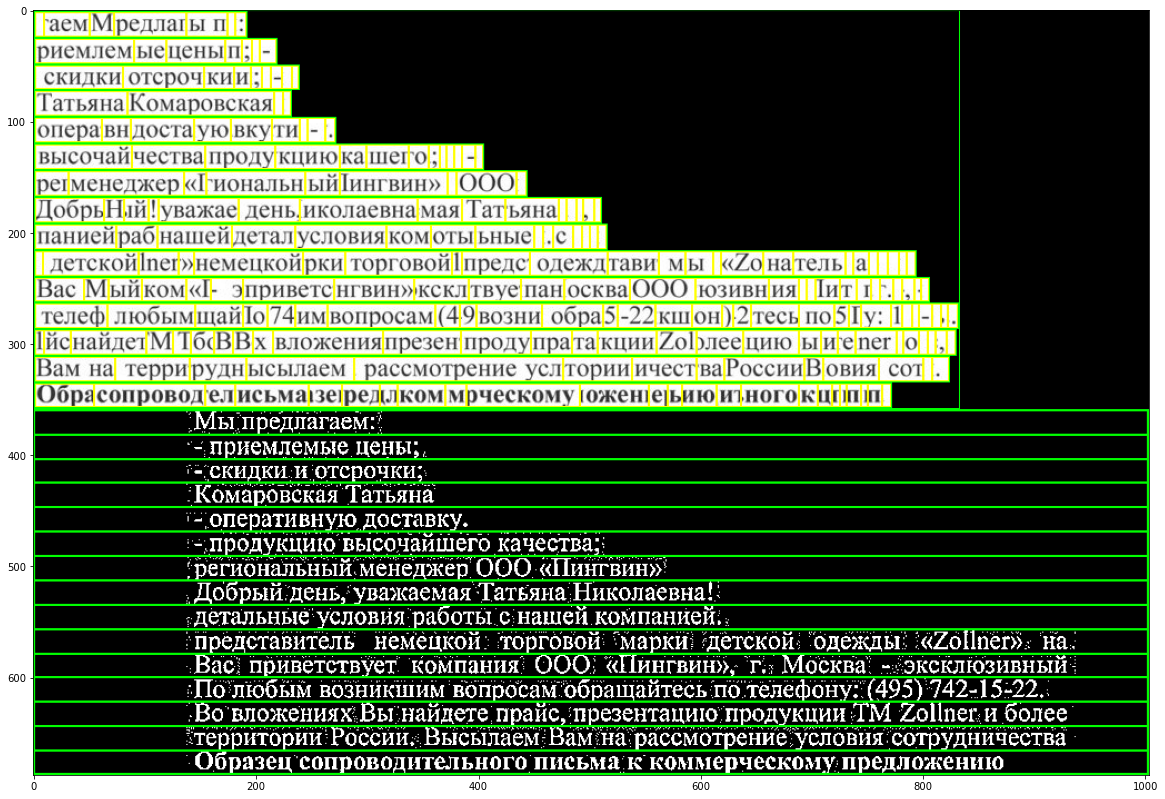

True

In [92]:
bigImg1 = tl.concat_ver((result_img, me))
fig, ax = plt.subplots(figsize=(20, 20))
ax.imshow(bigImg1, cmap='gray')
plt.show()
cv2.imwrite(f"img_task_4.jpg", bigImg1)